## 1. Data wrangling

This notebook contains the steps 3-4 to prepare the dataset for the modelling process:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning

Fistly, I will import the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno

plt.style.use('seaborn') # Set visual style for plots

%matplotlib inline

---
### 1.3. Quality check assesment

This step involves checking for missing or inconsistent values within the variables. A visual inspection is used in the cell below to check for links  

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOL_TYPE':'category',
            'EQUIP_AGE':'category',
            'HEAT_TYPE':'category',
            'CLIMATE_REGION':'category',
            'HIGH_CEIL':'category',
            'ATTIC':'category',
            'BASEMENT':'category',
            'BEDROOMS':'category',
            'BATHROOMS':'category',
            'THERMOSTAT':'category',
            'SIZEOFGARAGE':'category',
            'STORIES':'category',
            'OWNERSHIP':'category',
            'UNIT_TYPE':'category',
            'STORIES':'category',
            'DECADE_BUILT':'category'
            }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
# Inspect number of observations and variables

df.shape

(5686, 23)

In [4]:
# Print sample

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UNIT_TYPE       5686 non-null   category
 1   CLIMATE_REGION  5686 non-null   category
 2   DECADE_BUILT    5686 non-null   category
 3   FLOOR_AREA      5686 non-null   float64 
 4   COOL_TYPE       5686 non-null   category
 5   EQUIP_AGE       5686 non-null   category
 6   HEAT_TYPE       5686 non-null   category
 7   HIGH_CEIL       5400 non-null   category
 8   ATTIC           4231 non-null   category
 9   BASEMENT        4231 non-null   category
 10  BEDROOMS        5555 non-null   category
 11  THERMOSTAT      4904 non-null   category
 12  SIZEOFGARAGE    2571 non-null   category
 13  STORIES         4231 non-null   category
 14  OWNERSHIP       5686 non-null   category
 15  COOL_COST       5686 non-null   float64 
 16  HEAT_COST       5686 non-null   float64 
 17  WATERHEAT_COST

In the next cell, it can be seen the density and distribution of missing values (NaN) thoughout the full dataset. 

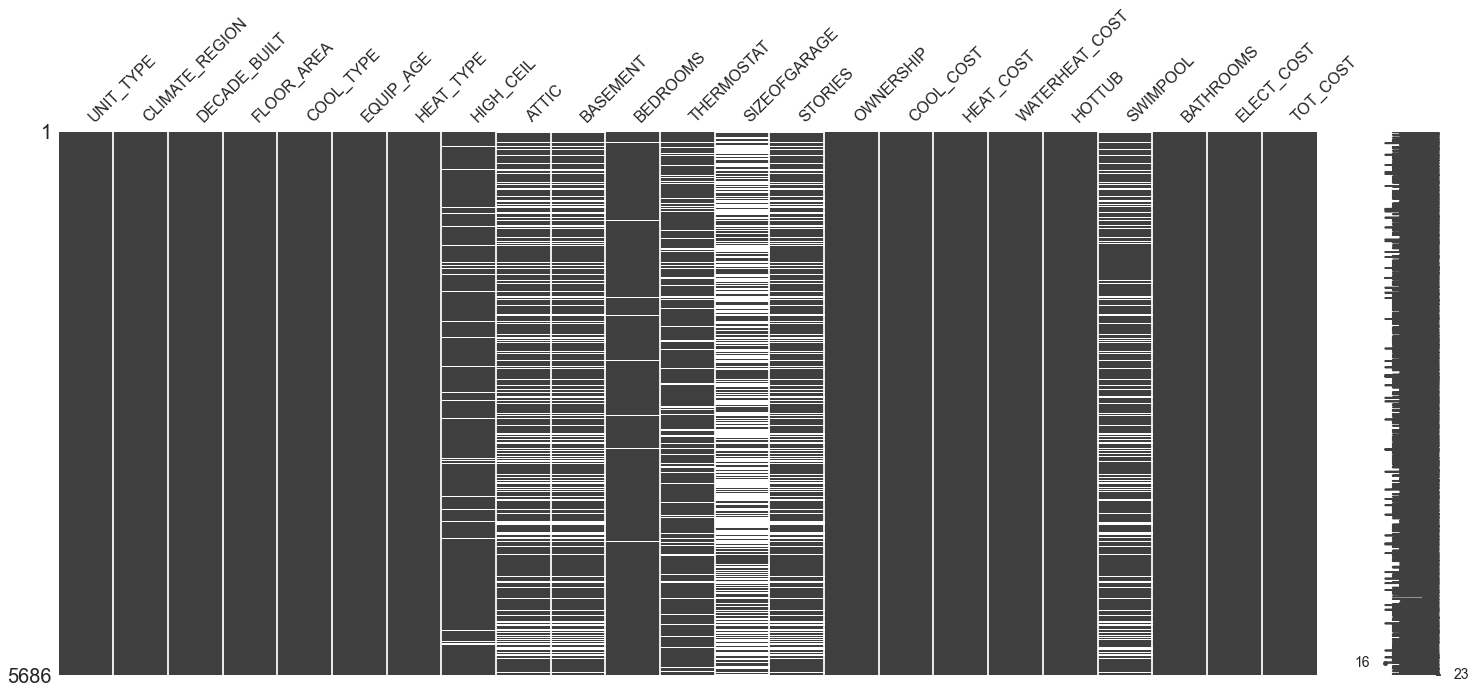

In [5]:
# Visualize missigness density and distribution

m = msno.matrix(df)
plt.show()

As expected, some variables present scattered missing values, since "-2" (Non-applicable) values were substituted by NaN values in previous steps.

The next two cells present same graph but sorted by unit type and climate respectively. The goal is to find out if these missing values are distributed random-wise or are consistent with other classification: 

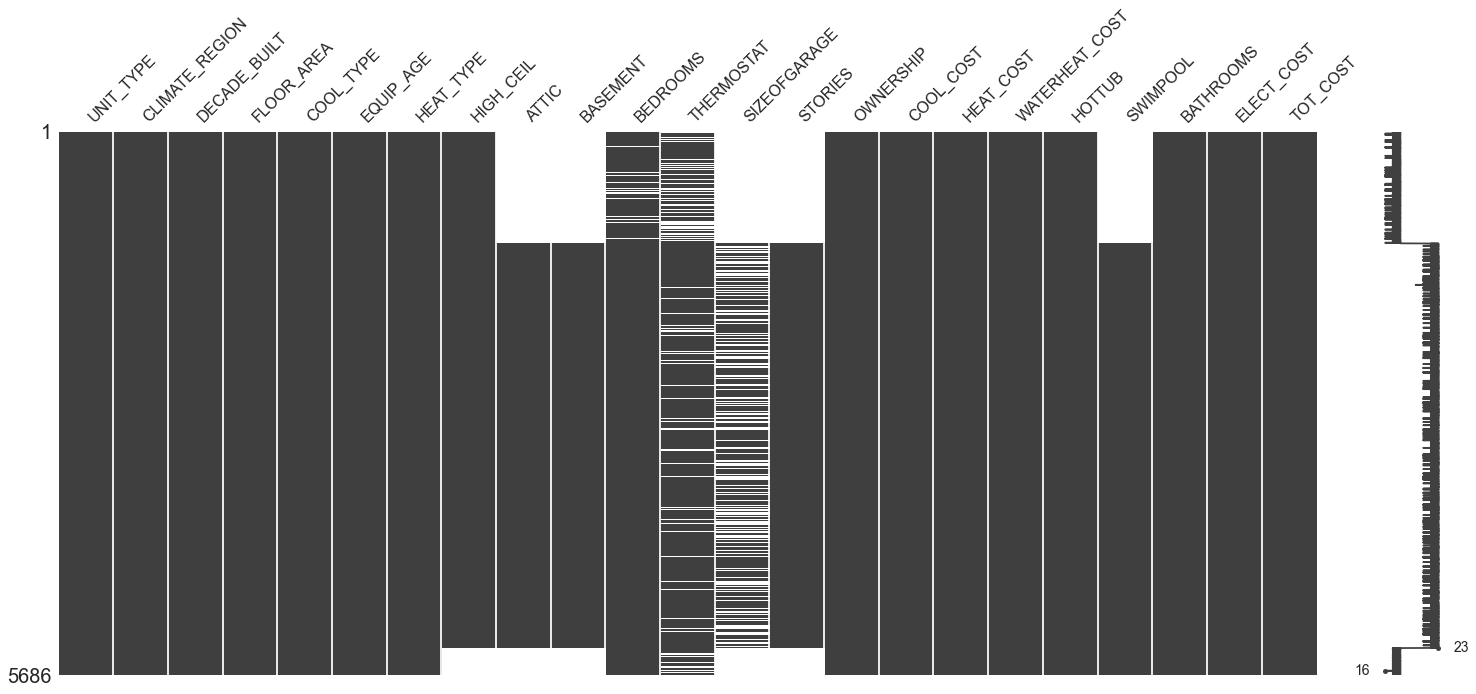

In [6]:
# Visualize missigness density and distribution by unit type

df_byTYPEHUQ = df.sort_values(by='UNIT_TYPE')

m = msno.matrix(df_byTYPEHUQ)
plt.show()

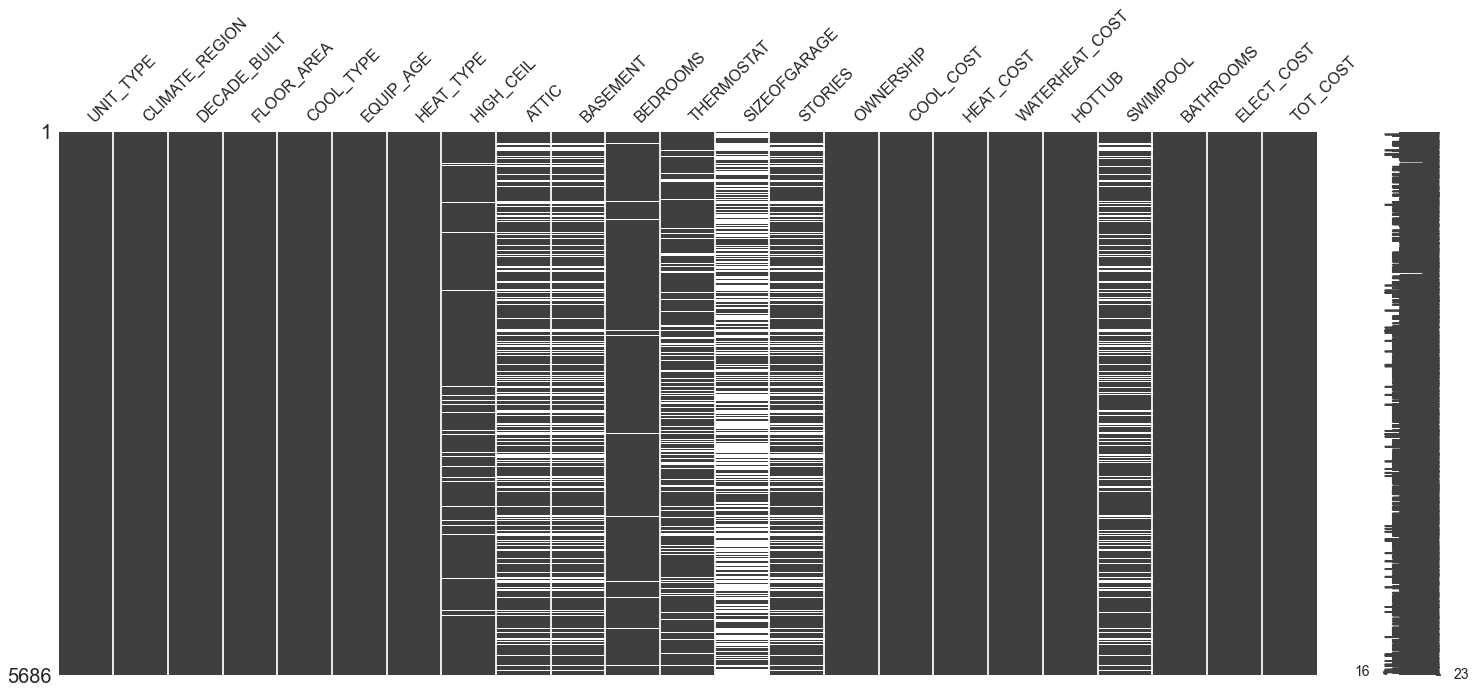

In [7]:
# Visualize missigness density and distribution by unit type

df_byCLIMATE = df.sort_values(by='CLIMATE_REGION')

m = msno.matrix(df_byCLIMATE)
plt.show()

It seems that most of these NaN values correspond to construction features that make sense only in certain types of units, i.e. Condo units cannot have basement or attic. 

Final data inspection:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UNIT_TYPE       5686 non-null   category
 1   CLIMATE_REGION  5686 non-null   category
 2   DECADE_BUILT    5686 non-null   category
 3   FLOOR_AREA      5686 non-null   float64 
 4   COOL_TYPE       5686 non-null   category
 5   EQUIP_AGE       5686 non-null   category
 6   HEAT_TYPE       5686 non-null   category
 7   HIGH_CEIL       5400 non-null   category
 8   ATTIC           4231 non-null   category
 9   BASEMENT        4231 non-null   category
 10  BEDROOMS        5555 non-null   category
 11  THERMOSTAT      4904 non-null   category
 12  SIZEOFGARAGE    2571 non-null   category
 13  STORIES         4231 non-null   category
 14  OWNERSHIP       5686 non-null   category
 15  COOL_COST       5686 non-null   float64 
 16  HEAT_COST       5686 non-null   float64 
 17  WATERHEAT_COST

---

### 1.4. Data cleaning

In this section NaN values will be replaced or removed according to its meaning and nature. For our dataset, the best option to deal with missing entries is to replace them with "0" value, representing the standard benchmark for the attributes in most cases. 

In [9]:
# Replace NaN values by 0 in selected variables

df.ATTIC.fillna('0.0', inplace=True)
df.BASEMENT.fillna('0.0', inplace=True)

df.SIZEOFGARAGE.cat.add_categories('0.0', inplace=True)
df.SIZEOFGARAGE.fillna('0.0', inplace=True)

df.THERMOSTAT.fillna('0.0', inplace=True)
df.HIGH_CEIL.fillna('0.0', inplace=True)

# In the case of STORIES variable (categorical) NaN values are replaced by 1, assuming a baseline of 1.

df.STORIES.fillna('1', inplace=True) 

A simple boxplot is used to find values out of the interquartile range (outliers):

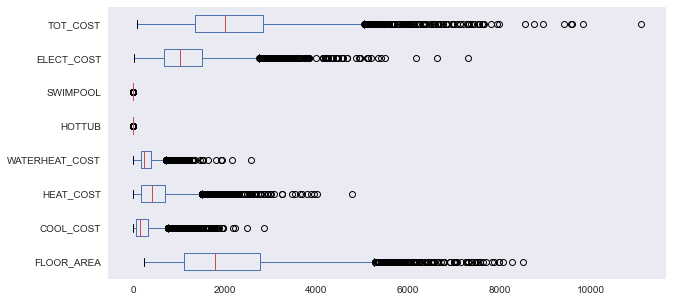

In [10]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'category']

# Plot boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(10,5))
plt.show()

It can be observed a number of outliers in most of the continuous variables which have right long tailed distribution as shown in the previous notebook. 

Instead of removing these extremes data points, a better approach is to apply logarithmic data transformation to de-emphasizes outliers and obtain a potential bell-shaped distribution by restoring the symmetry.

In [11]:
# Apply log transform to all numerical variables

df['WATERHEAT_COST_log'] = np.log(df.loc[:, 'WATERHEAT_COST'] + 1)
df['FLOOR_AREA_log'] = np.log(df.loc[:, 'FLOOR_AREA'] + 1)
df['HEAT_COST_log'] = np.log(df.loc[:, 'HEAT_COST'] + 1)
df['ELECT_COST_log'] = np.log(df.loc[:, 'ELECT_COST'] + 1)
df['COOL_COST_log'] = np.log(df.loc[:, 'COOL_COST'] + 1)
df['TOT_COST_log'] = np.log(df.loc[:, 'TOT_COST'] + 1)

In [12]:
# Drop original columns

df.drop(columns=['WATERHEAT_COST', 'FLOOR_AREA', 'HEAT_COST', 
                 'ELECT_COST', 'COOL_COST', 'TOT_COST'], inplace=True)

In [13]:
# Check values in a random newly created variable from log transformation

df['HEAT_COST_log'].describe()

count    5686.000000
mean        5.549730
std         1.684930
min         0.000000
25%         5.106067
50%         5.996066
75%         6.545648
max         8.469611
Name: HEAT_COST_log, dtype: float64

Histograms of the newly created variables are presented below: 

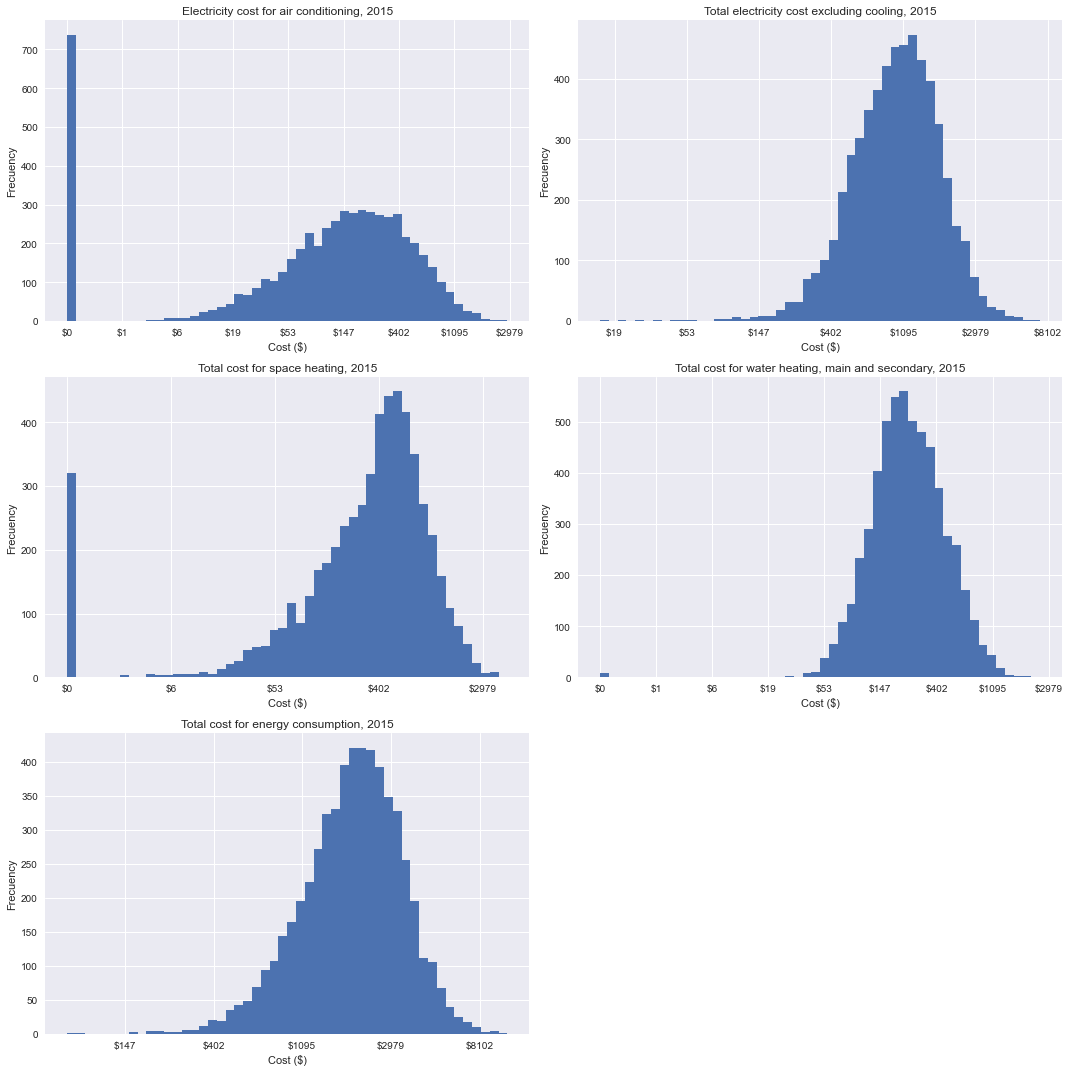

In [14]:
# Plot histograms of log transformed utility spending variables

fig = plt.figure(figsize=(15,15), dpi=72) # Create figure
formatter = ticker.FuncFormatter(lambda x, pos: '$%d' % (np.exp(x)-1))

# Plot cooling costs
ax1 = plt.subplot(3,2,1)
plt.hist(df['COOL_COST_log'], bins=50)
plt.title('Electricity cost for air conditioning, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

# Format y and x axis to reproduce legible log scale
ax1.xaxis.set_major_formatter(formatter)

# Plot electricity costs
ax2 = plt.subplot(3,2,2)
plt.hist(df['ELECT_COST_log'], bins=50)
plt.title('Total electricity cost excluding cooling, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')
ax2.xaxis.set_major_formatter(formatter)

# Plot heating costs
ax3 = plt.subplot(3,2,3)
plt.hist(df['HEAT_COST_log'], bins=50)
plt.title('Total cost for space heating, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')
ax3.xaxis.set_major_formatter(formatter)

# Plot water heating costs
ax4 = plt.subplot(3,2,4)
plt.hist(df['WATERHEAT_COST_log'], bins=50)
plt.title('Total cost for water heating, main and secondary, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')
ax4.xaxis.set_major_formatter(formatter)

# Plot total costs
ax5 = plt.subplot(3,2,5)
plt.hist(df['TOT_COST_log'], bins=50)
plt.title('Total cost for energy consumption, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')
ax5.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

A new boxplot is created to assess the presence of outliers after the log transformation:

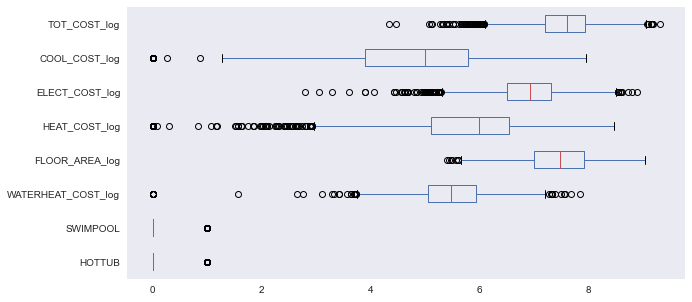

In [15]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'category']

# Plot boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(10,5))
plt.show()

Finally, columns are rearranged and the dataset is stored as a csv file

In [16]:
# Rearrange columns for better organization

column_list = ['UNIT_TYPE', 'CLIMATE_REGION', 'DECADE_BUILT',
       'FLOOR_AREA_log', 'COOL_TYPE', 'EQUIP_AGE', 'HEAT_TYPE', 'THERMOSTAT',
       'HIGH_CEIL', 'ATTIC', 'BASEMENT', 'BEDROOMS', 'BATHROOMS',
       'SIZEOFGARAGE', 'STORIES', 'OWNERSHIP',
       'COOL_COST_log', 'HEAT_COST_log',
       'WATERHEAT_COST_log', 'ELECT_COST_log', 'TOT_COST_log']

df = df[column_list]

In [17]:
# Write df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/clean.csv'

df.to_csv(path)